In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
df.shape

(493, 22)

In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['name_of_city'] = lb.fit_transform(df['name_of_city'])
df['state_name'] = lb.fit_transform(df['state_name'])
df['location'] = lb.fit_transform(df['location'])
df.dtypes

name_of_city                        int64
state_code                          int64
state_name                          int64
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                            int64
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [14]:
x = df[['effective_literacy_rate_total']]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xx = ss.fit_transform(x)

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

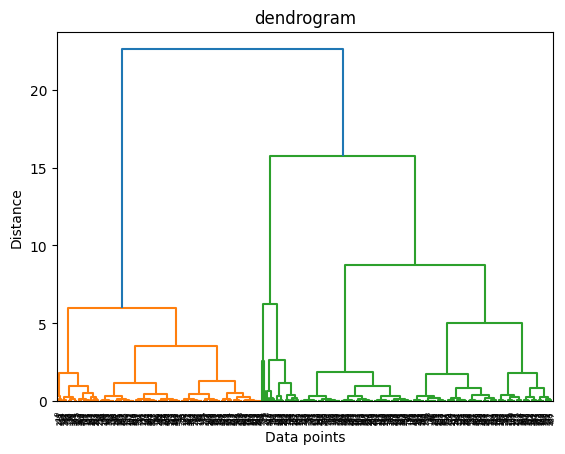

In [18]:
import matplotlib.pyplot as plt
dendro = dendrogram(linkage(xx, method="ward"))
plt.title("dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_pred = hc.fit_predict(xx)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:
df['cluster'] = y_pred

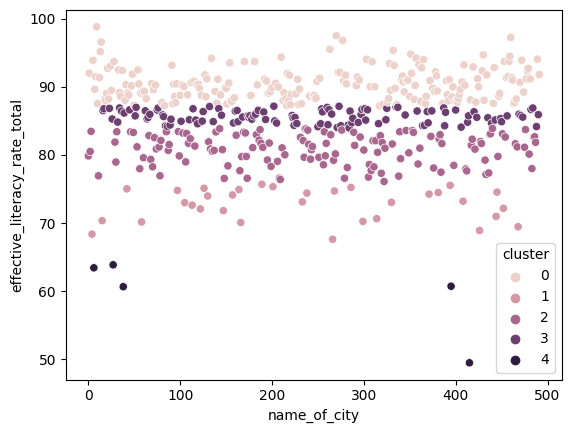

In [28]:
import seaborn as sns
sns.scatterplot(x=df['name_of_city'], y=df['effective_literacy_rate_total'], hue=df['cluster'])
plt.show()